# Introduction

- Predictive maintenance on NASA's turbofan engine degradation dataset (CMAPSS). 
- Datasets include simulations of multiple turbofan engines over time, each row contains the following information:
  1. Engine unit number
  2. Time, in cycles
  3. Three operational settings
  4. 21 sensor readings.




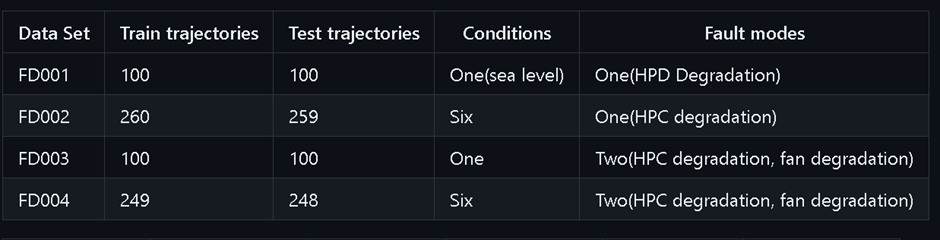

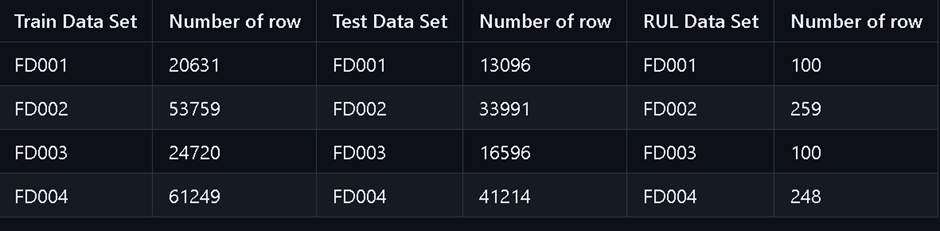

# Importing Necessary Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option("display.max_rows", None)


# Importing the Dataset

In [2]:

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]

col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv('train_FD004.txt',sep='\s+', header=None, names=col_names)
test = pd.read_csv('test_FD004.txt',sep='\s+', header=None, names=col_names)
y_test = pd.read_csv('RUL_FD004.txt', sep='\s+', header=None, names=['RUL'])

# Train data contains all features (Unit Number + setting parameters & sensor parameters)
# Test data contains all features (Unit Number + setting parameters & sensor parameters)
# Y_test contains RUL for the test data.
train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    42.0049     0.8400      100.0  445.00  549.68   
1        1            2    20.0020     0.7002      100.0  491.19  606.07   
2        1            3    42.0038     0.8409      100.0  445.00  548.95   
3        1            4    42.0000     0.8400      100.0  445.00  548.70   
4        1            5    25.0063     0.6207       60.0  462.54  536.10   

       s_3      s_4   s_5  ...    s_12     s_13     s_14     s_15  s_16  s_17  \
0  1343.43  1112.93  3.91  ...  129.78  2387.99  8074.83   9.3335  0.02   330   
1  1477.61  1237.50  9.35  ...  312.59  2387.73  8046.13   9.1913  0.02   361   
2  1343.12  1117.05  3.91  ...  129.62  2387.97  8066.62   9.4007  0.02   329   
3  1341.24  1118.03  3.91  ...  129.80  2388.02  8076.05   9.3369  0.02   328   
4  1255.23  1033.59  7.05  ...  164.11  2028.08  7865.80  10.8366  0.02   305   

   s_18    s_19   s_20     s_21  
0  2212  100.00  10.62   6.3670  
1  2324  100.00  24.37  14.6552  
2  2212  100.00  10.48   6.4213  
3  2212  100.00  10.54   6.4176  
4  1915   84.93  14.03   8.6754  

[5 rows x 26 columns]

In [3]:
test.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    20.0072     0.7000      100.0  491.19  606.67   
1        1            2    24.9984     0.6200       60.0  462.54  536.22   
2        1            3    42.0000     0.8420      100.0  445.00  549.23   
3        1            4    42.0035     0.8402      100.0  445.00  549.19   
4        1            5    35.0079     0.8400      100.0  449.44  555.10   

       s_3      s_4   s_5  ...    s_12     s_13     s_14     s_15  s_16  s_17  \
0  1481.04  1227.81  9.35  ...  313.03  2387.78  8048.98   9.2229  0.02   362   
1  1256.17  1031.48  7.05  ...  163.61  2028.09  7863.46  10.8632  0.02   306   
2  1340.13  1105.88  3.91  ...  129.98  2387.95  8071.13   9.3960  0.02   328   
3  1339.70  1107.26  3.91  ...  129.48  2387.90  8078.89   9.3594  0.02   328   
4  1353.04  1117.80  5.48  ...  181.82  2387.87  8057.83   9.3030  0.02   333   

   s_18    s_19   s_20     s_21  
0  2324  100.00  24.31  14.7007  
1  1915   84.93  14.36   8.5748  
2  2212  100.00  10.39   6.4365  
3  2212  100.00  10.56   6.2367  
4  2223  100.00  14.85   8.9326  

[5 rows x 26 columns]

In [4]:
y_test.head()

RUL
0   22
1   39
2  107
3   75
4  149

In [5]:
train.shape

(61249, 26)

In [6]:
y_test.shape

(248, 1)

In [7]:
train['unit_nr'].unique()

# There are 259 no unique engines.

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Note:  for Test Dataset Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
therefore the test dataset will be subsetted to represent the same.

In [8]:
test.shape

(41214, 26)

In [9]:
# Since the true RUL values (y_test) for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same

test = test.groupby('unit_nr').last().reset_index().drop(['unit_nr','time_cycles'], axis=1)


In [10]:
y_test.shape

# RUL value for 259 no of engines.

(248, 1)

In [11]:
test.shape
# Now test data contains entries for 259 no of engines with their RUL.

(248, 24)

# Data Pre-Processing + Data Visualization

In [12]:
train.describe()

unit_nr   time_cycles     setting_1     setting_2     setting_3  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     124.325181    134.311417     23.999823      0.571347     94.031576   
std       71.995350     89.783389     14.780722      0.310703     14.251954   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       60.000000     62.000000     10.004600      0.250700    100.000000   
50%      126.000000    123.000000     25.001400      0.700000    100.000000   
75%      185.000000    191.000000     41.998100      0.840000    100.000000   
max      249.000000    543.000000     42.008000      0.842000    100.000000   

                s_1           s_2           s_3           s_4           s_5  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     472.882435    579.420056   1417.896600   1201.915359      8.031626   
std       26.436832     37.342647    106.167598    119.327591      3.622872   
min      445.000000    535.480000   1242.670000   1024.420000      3.910000   
25%      445.000000    549.330000   1350.550000   1119.490000      3.910000   
50%      462.540000    555.740000   1367.680000   1136.920000      7.050000   
75%      491.190000    607.070000   1497.420000   1302.620000     10.520000   
max      518.670000    644.420000   1613.000000   1440.770000     14.620000   

       ...          s_12          s_13          s_14          s_15  \
count  ...  61249.000000  61249.000000  61249.000000  61249.000000   
mean   ...    266.735665   2334.427590   8067.811812      9.285604   
std    ...    138.479109    128.197859     85.670543      0.750374   
min    ...    128.310000   2027.570000   7845.780000      8.175700   
25%    ...    134.520000   2387.910000   8062.630000      8.648000   
50%    ...    183.450000   2388.060000   8083.810000      9.255600   
75%    ...    371.400000   2388.170000   8128.350000      9.365800   
max    ...    537.490000   2390.490000   8261.650000     11.066300   

               s_16          s_17          s_18          s_19          s_20  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean       0.023252    347.760029   2228.613283     97.751396     20.864333   
std        0.004685     27.808283    145.472491      5.369424      9.936396   
min        0.020000    302.000000   1915.000000     84.930000     10.160000   
25%        0.020000    330.000000   2212.000000    100.000000     10.940000   
50%        0.020000    334.000000   2223.000000    100.000000     14.930000   
75%        0.030000    368.000000   2324.000000    100.000000     28.560000   
max        0.030000    399.000000   2388.000000    100.000000     39.890000   

               s_21  
count  61249.000000  
mean      12.518995  
std        5.962697  
min        6.084300  
25%        6.566100  
50%        8.960100  
75%       17.135500  
max       23.885200  

[8 rows x 26 columns]

In [13]:
# Adding RUL (Ramining Useful Life) to the train dataset

In [14]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[sensor_names+['RUL']].head()

s_1     s_2      s_3      s_4   s_5    s_6     s_7      s_8      s_9  \
0  445.00  549.68  1343.43  1112.93  3.91   5.70  137.36  2211.86  8311.32   
1  491.19  606.07  1477.61  1237.50  9.35  13.61  332.10  2323.66  8713.60   
2  445.00  548.95  1343.12  1117.05  3.91   5.69  138.18  2211.92  8306.69   
3  445.00  548.70  1341.24  1118.03  3.91   5.70  137.98  2211.88  8312.35   
4  462.54  536.10  1255.23  1033.59  7.05   9.00  174.82  1915.22  7994.94   

   s_10  ...     s_13     s_14     s_15  s_16  s_17  s_18    s_19   s_20  \
0  1.01  ...  2387.99  8074.83   9.3335  0.02   330  2212  100.00  10.62   
1  1.07  ...  2387.73  8046.13   9.1913  0.02   361  2324  100.00  24.37   
2  1.01  ...  2387.97  8066.62   9.4007  0.02   329  2212  100.00  10.48   
3  1.02  ...  2388.02  8076.05   9.3369  0.02   328  2212  100.00  10.54   
4  0.93  ...  2028.08  7865.80  10.8366  0.02   305  1915   84.93  14.03   

      s_21  RUL  
0   6.3670  320  
1  14.6552  319  
2   6.4213  318  
3   6.4176  317  
4   8.6754  316  

[5 rows x 22 columns]

In [15]:
train.head(5)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    42.0049     0.8400      100.0  445.00  549.68   
1        1            2    20.0020     0.7002      100.0  491.19  606.07   
2        1            3    42.0038     0.8409      100.0  445.00  548.95   
3        1            4    42.0000     0.8400      100.0  445.00  548.70   
4        1            5    25.0063     0.6207       60.0  462.54  536.10   

       s_3      s_4   s_5  ...     s_13     s_14     s_15  s_16  s_17  s_18  \
0  1343.43  1112.93  3.91  ...  2387.99  8074.83   9.3335  0.02   330  2212   
1  1477.61  1237.50  9.35  ...  2387.73  8046.13   9.1913  0.02   361  2324   
2  1343.12  1117.05  3.91  ...  2387.97  8066.62   9.4007  0.02   329  2212   
3  1341.24  1118.03  3.91  ...  2388.02  8076.05   9.3369  0.02   328  2212   
4  1255.23  1033.59  7.05  ...  2028.08  7865.80  10.8366  0.02   305  1915   

     s_19   s_20     s_21  RUL  
0  100.00  10.62   6.3670  320  
1  100.00  24.37  14.6552  319  
2  100.00  10.48   6.4213  318  
3  100.00  10.54   6.4176  317  
4   84.93  14.03   8.6754  316  

[5 rows x 27 columns]

## Plotting of RUL

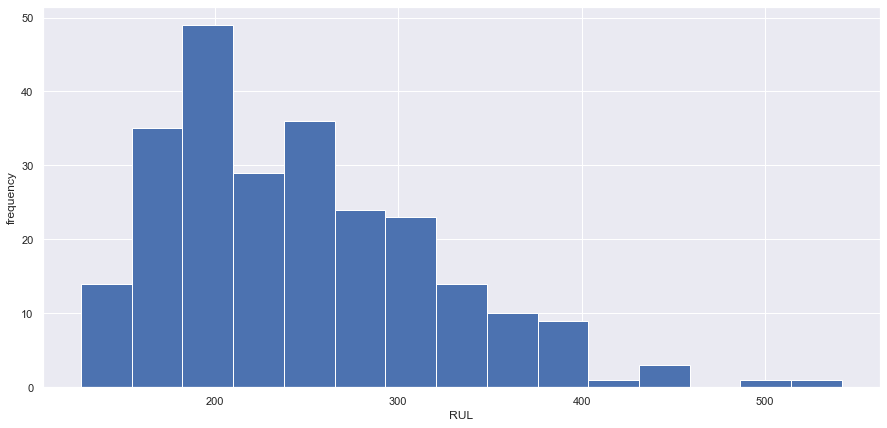

In [16]:
# distribution of RUL, similar to the 'describe function' of time_cycles above, but visual
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [17]:
# We can see the RUL for engine is bit skewed on left side. This may affect perfomance of the model however as of now we will keep it as it.


## Plotting of Sensor Values Vs RUL

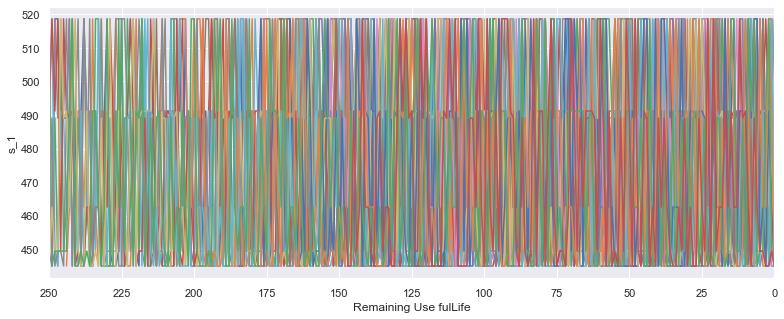

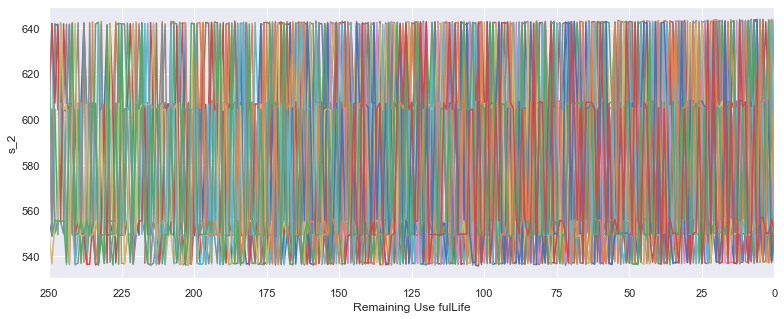

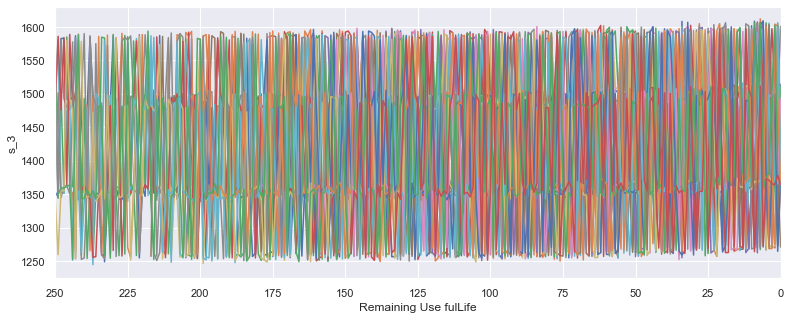

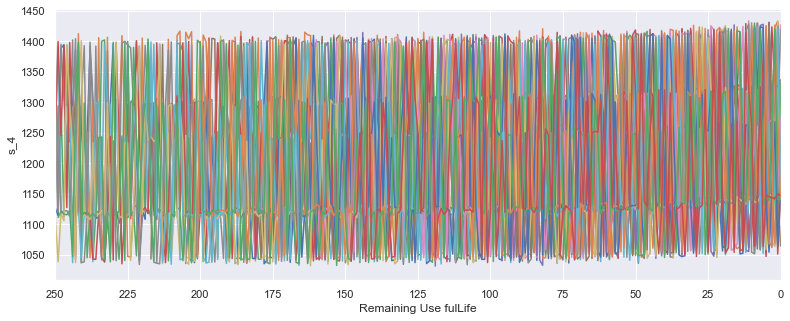

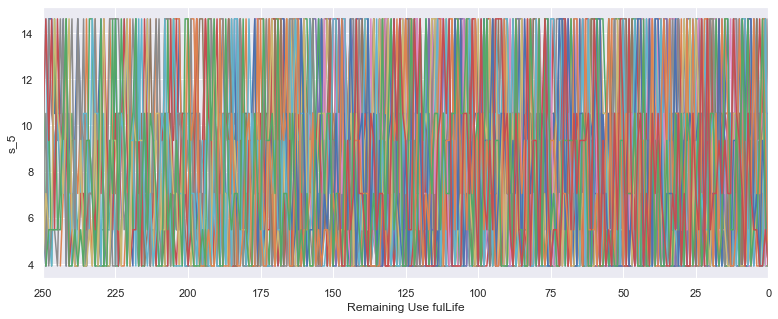

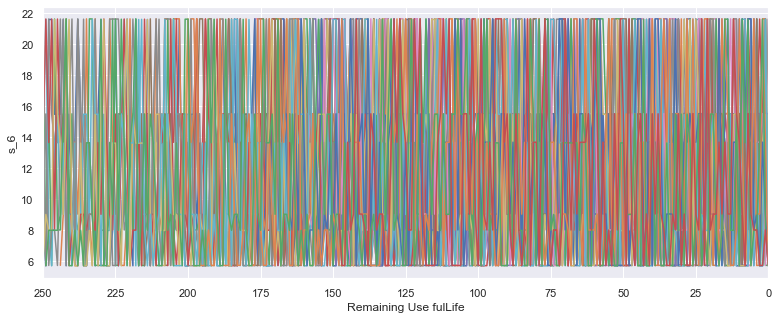

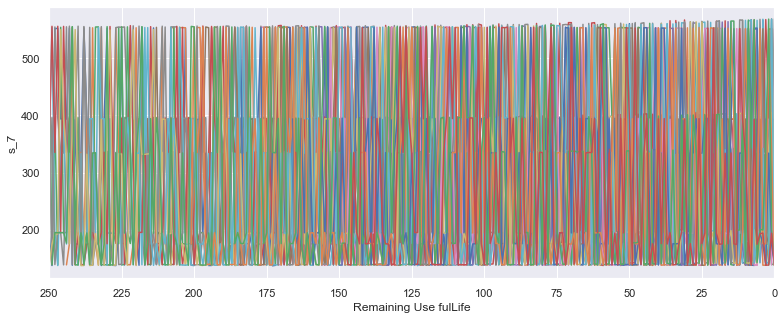

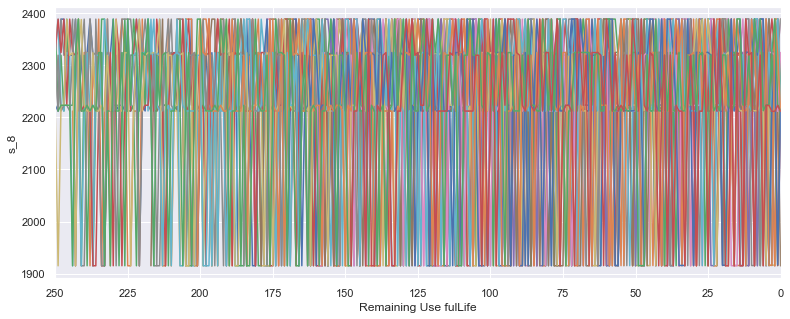

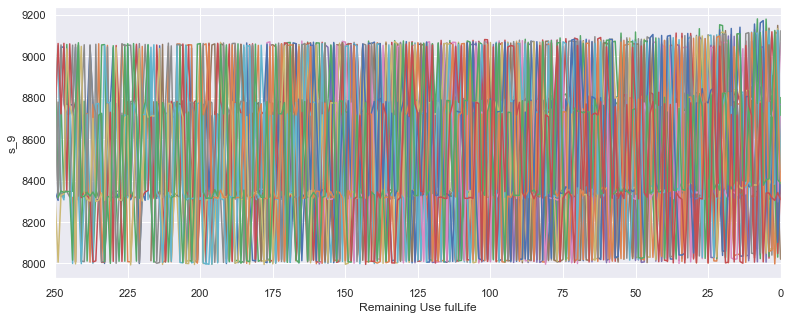

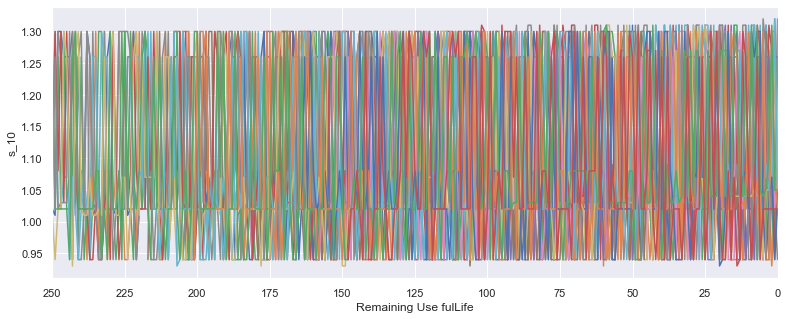

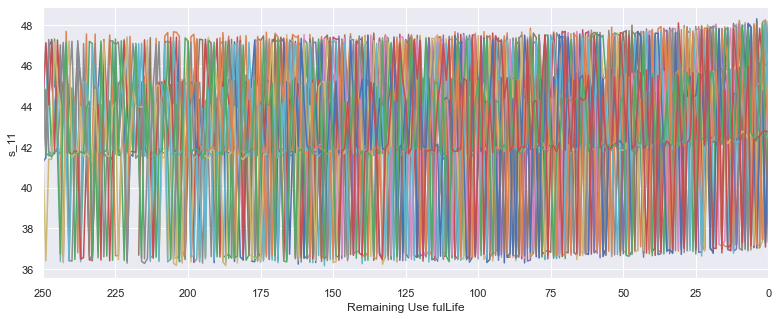

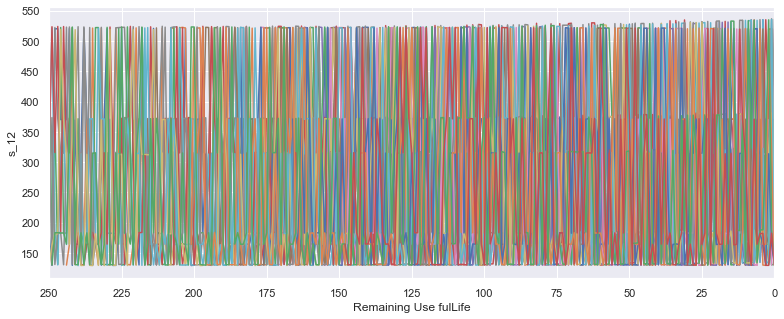

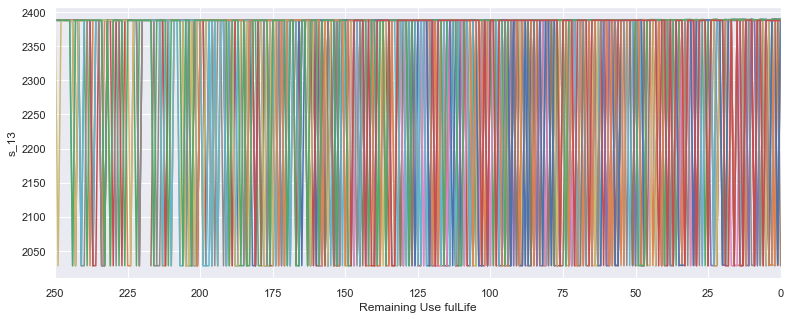

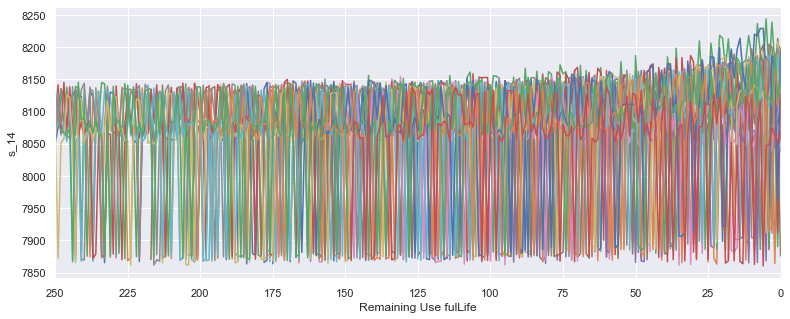

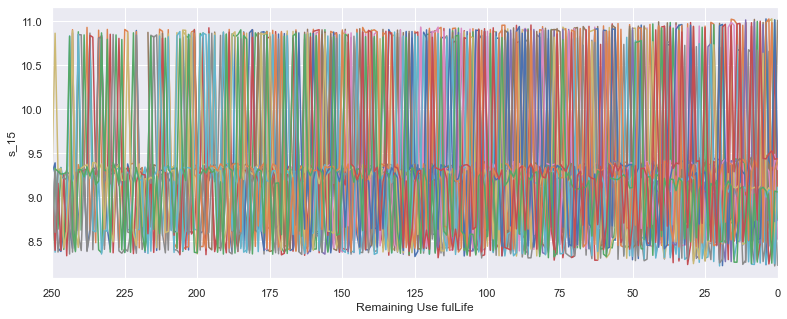

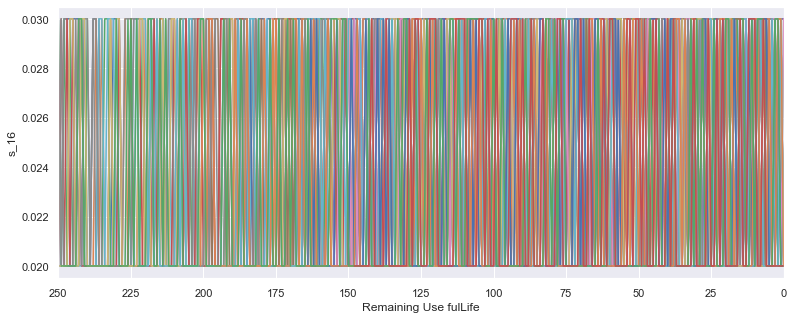

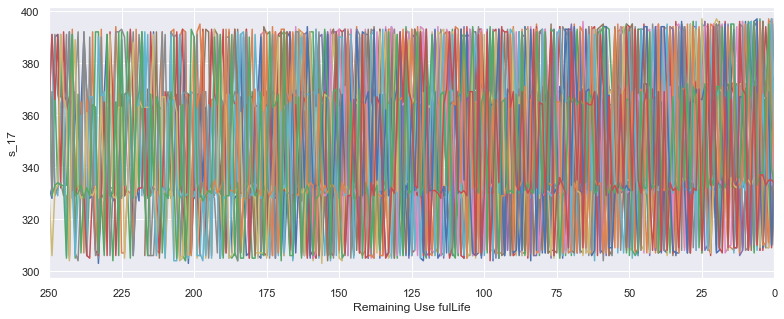

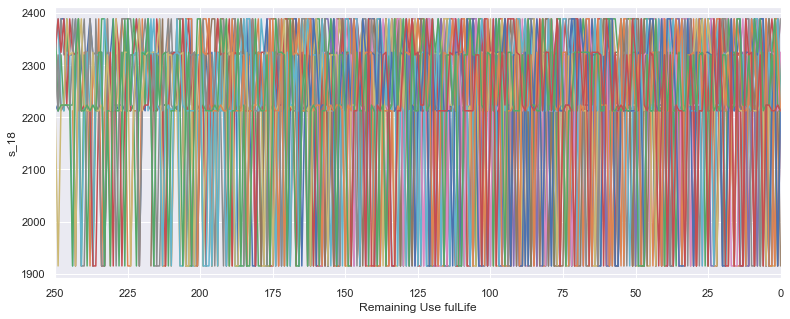

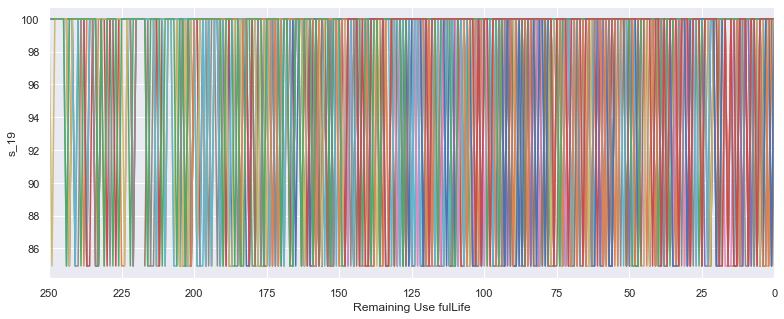

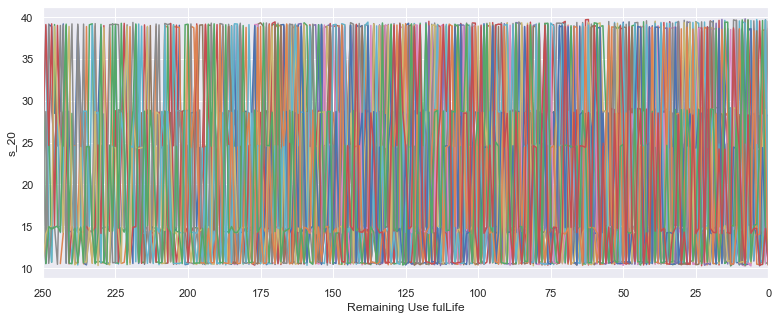

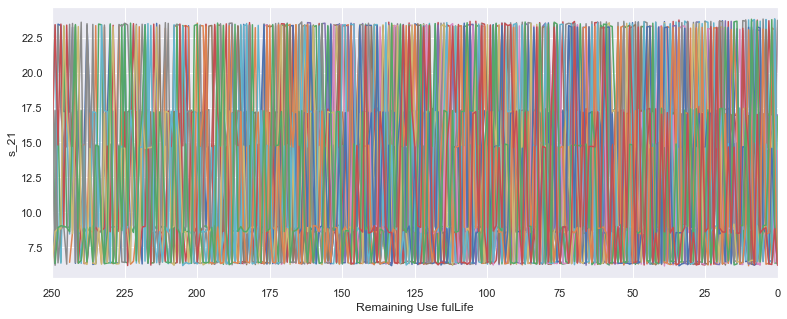

In [18]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

- Based on the plots you can see all sensors hold information related to Remaining Useful Life.
- As on now we will keep all features and will remove non-important features after calculating correlation value of each sensor variable with the RUL.

## Boxplots to find outliers

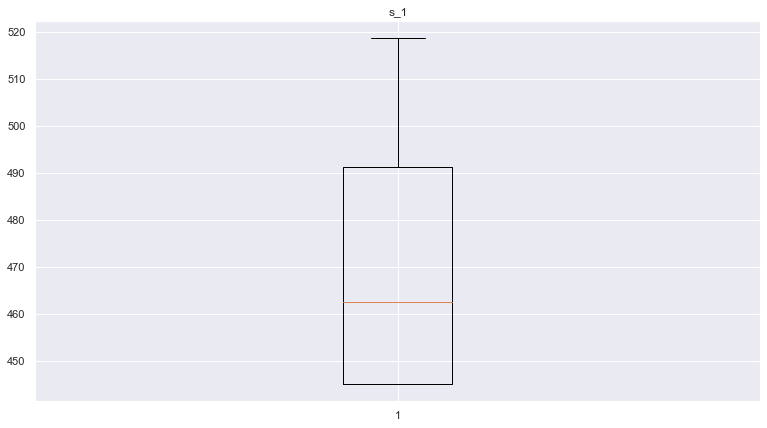

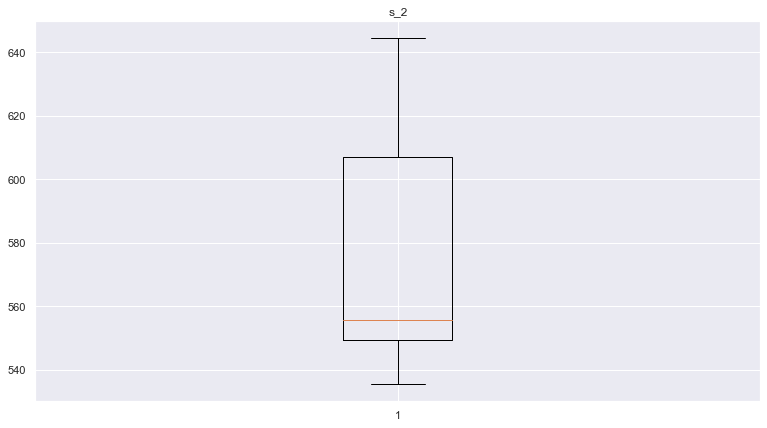

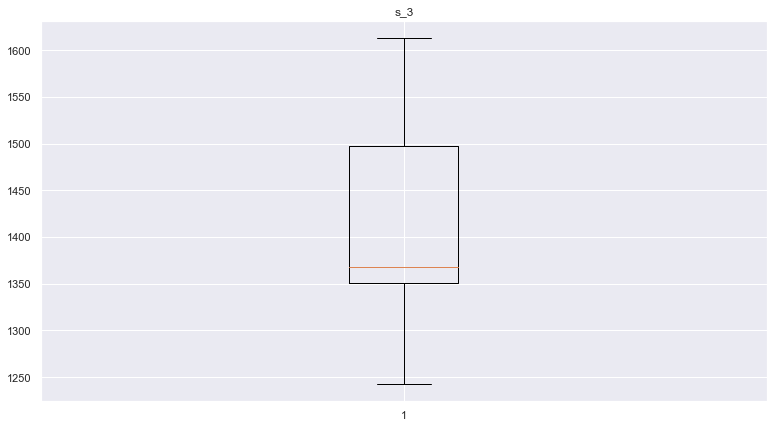

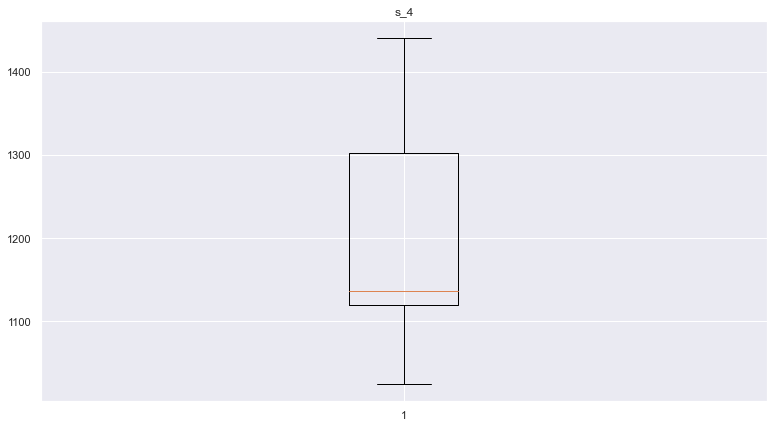

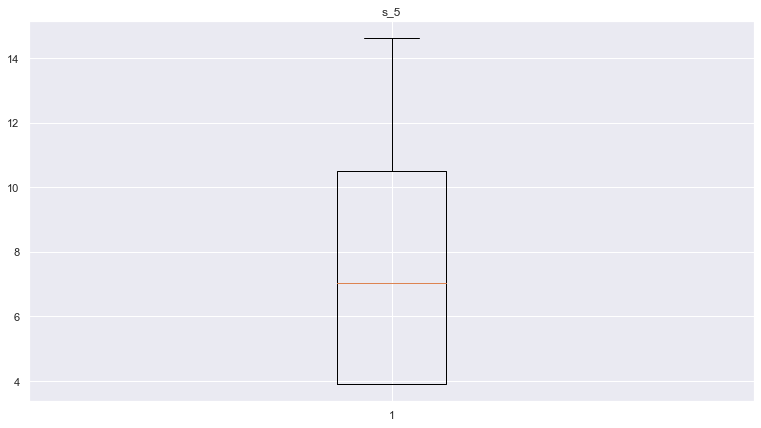

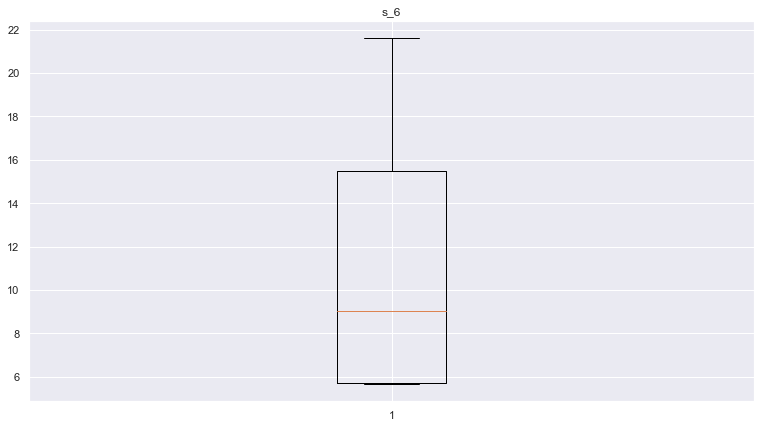

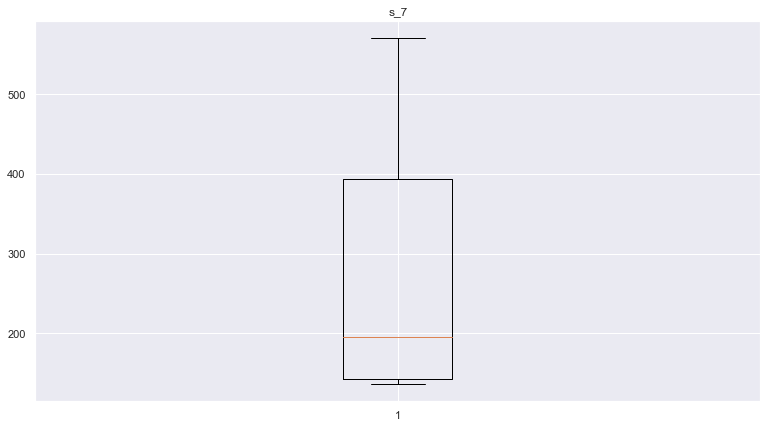

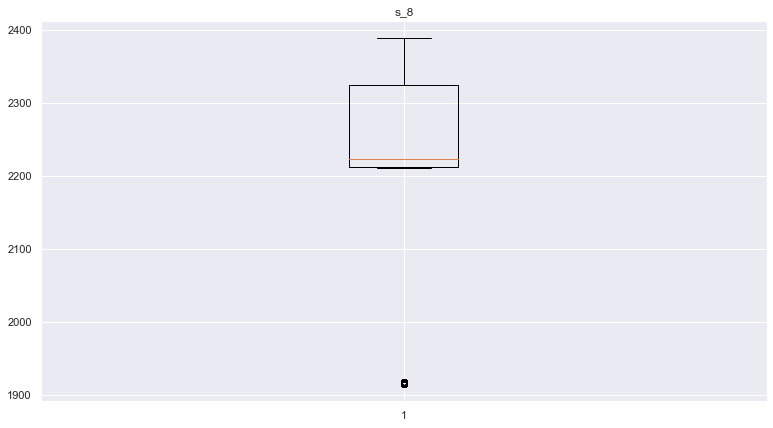

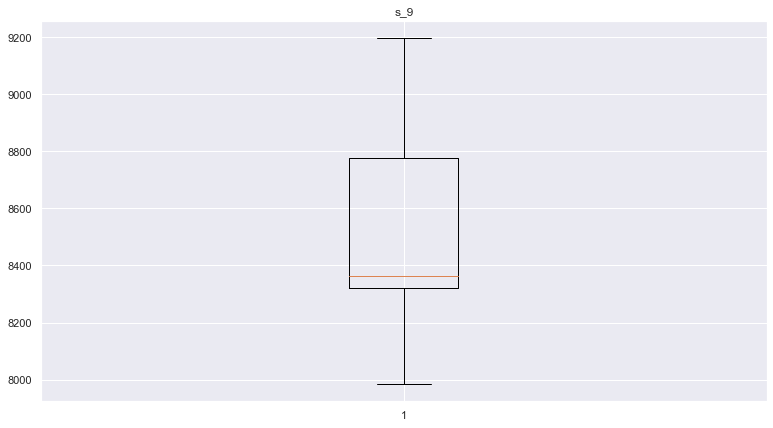

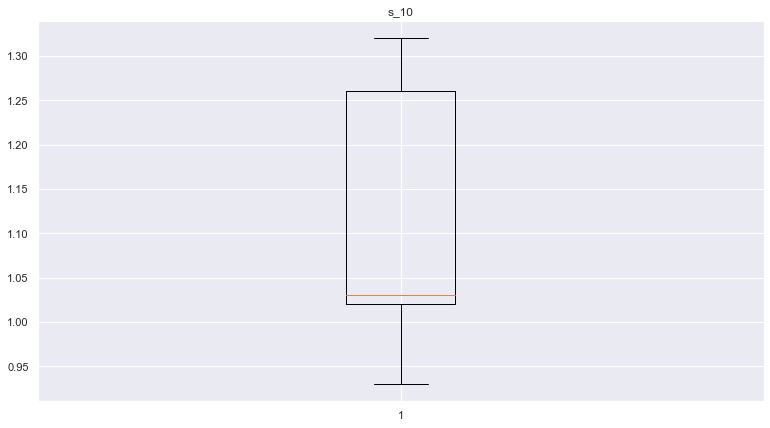

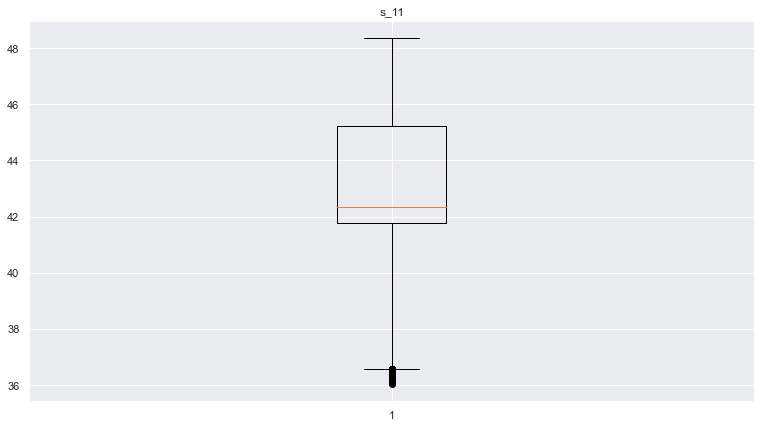

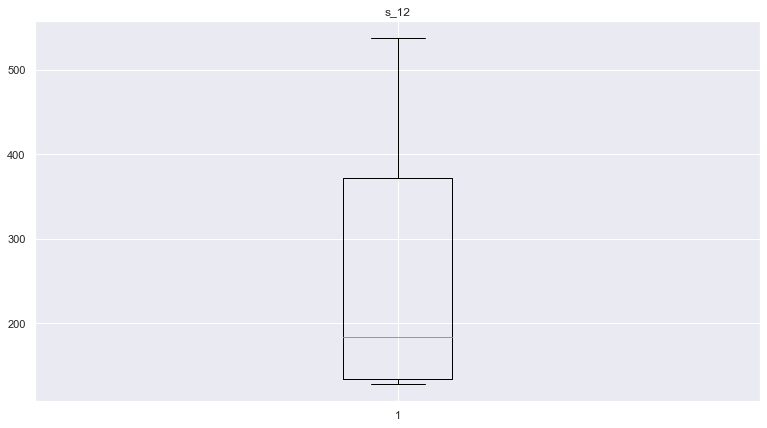

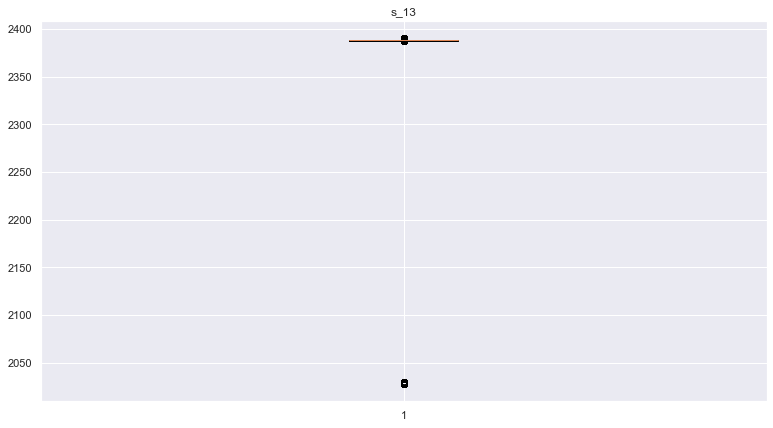

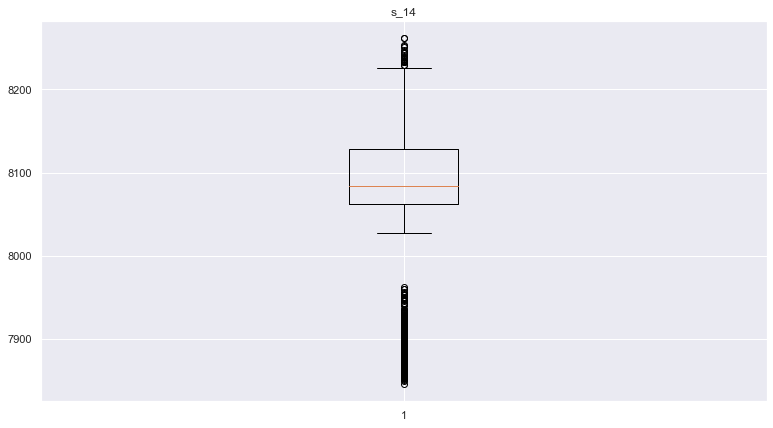

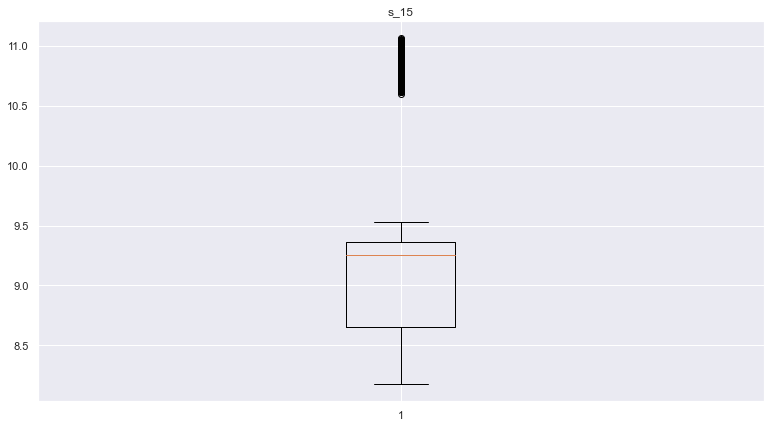

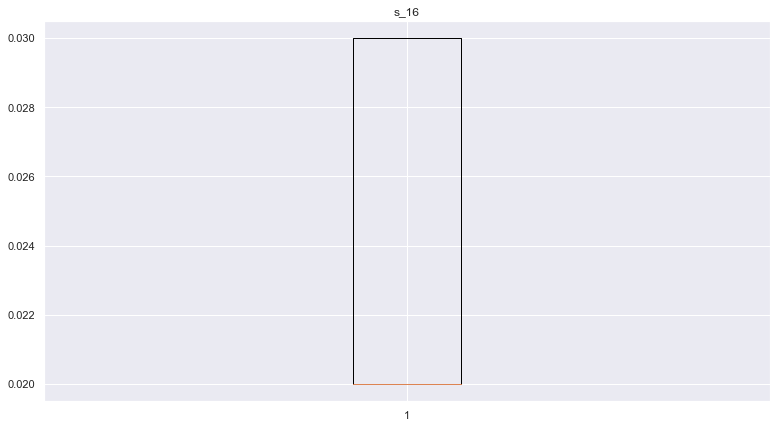

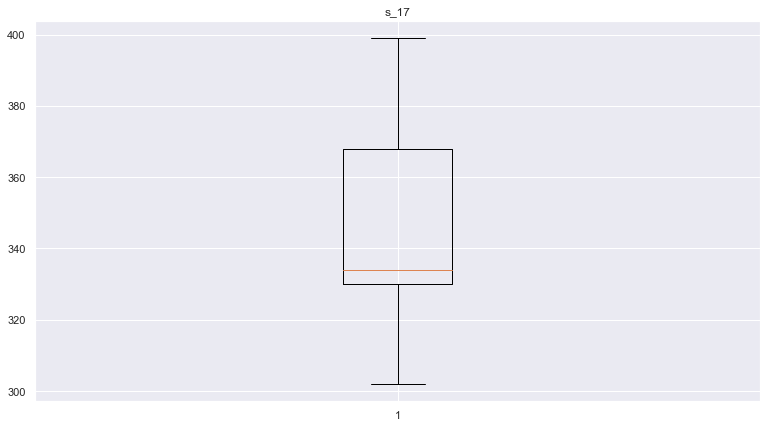

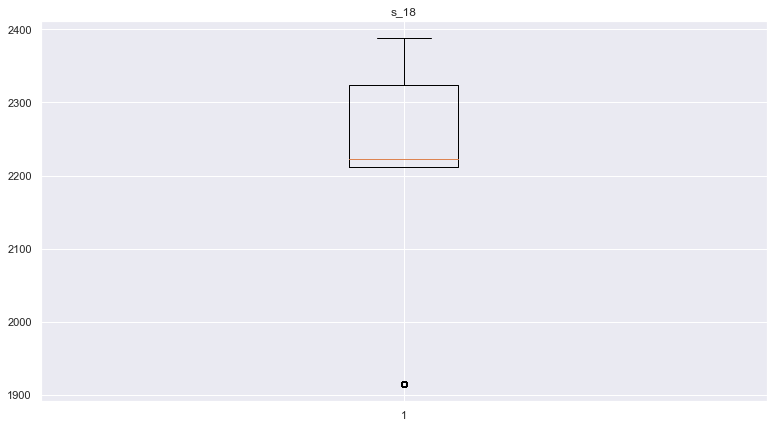

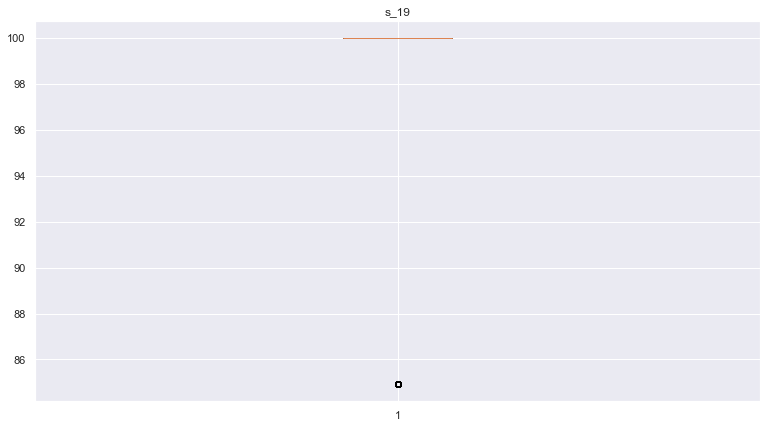

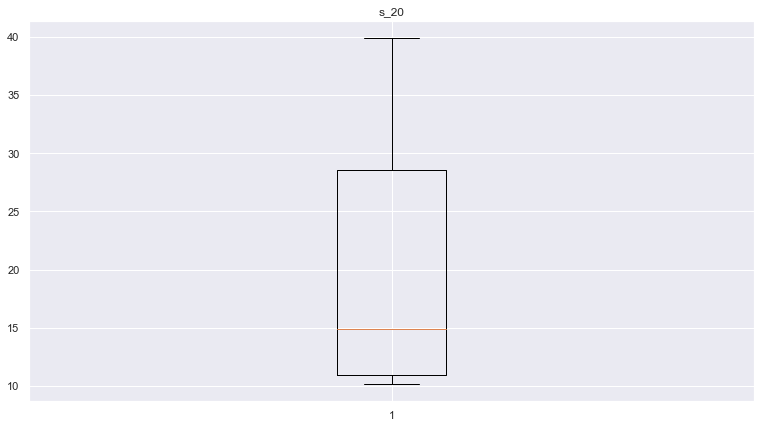

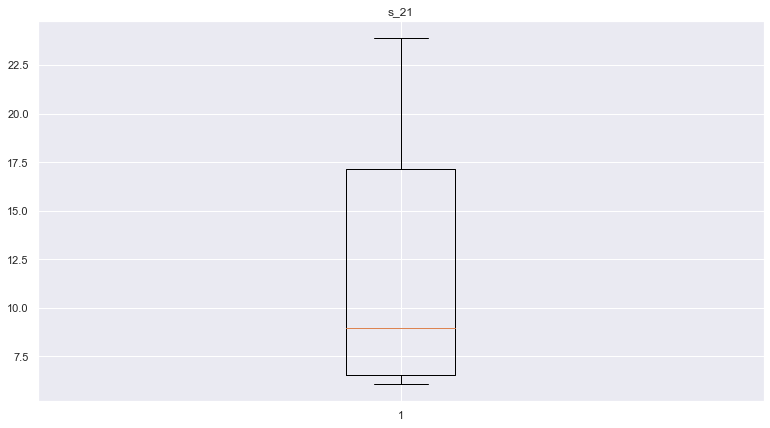

In [19]:
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()

## Max time cycle found for each Unit

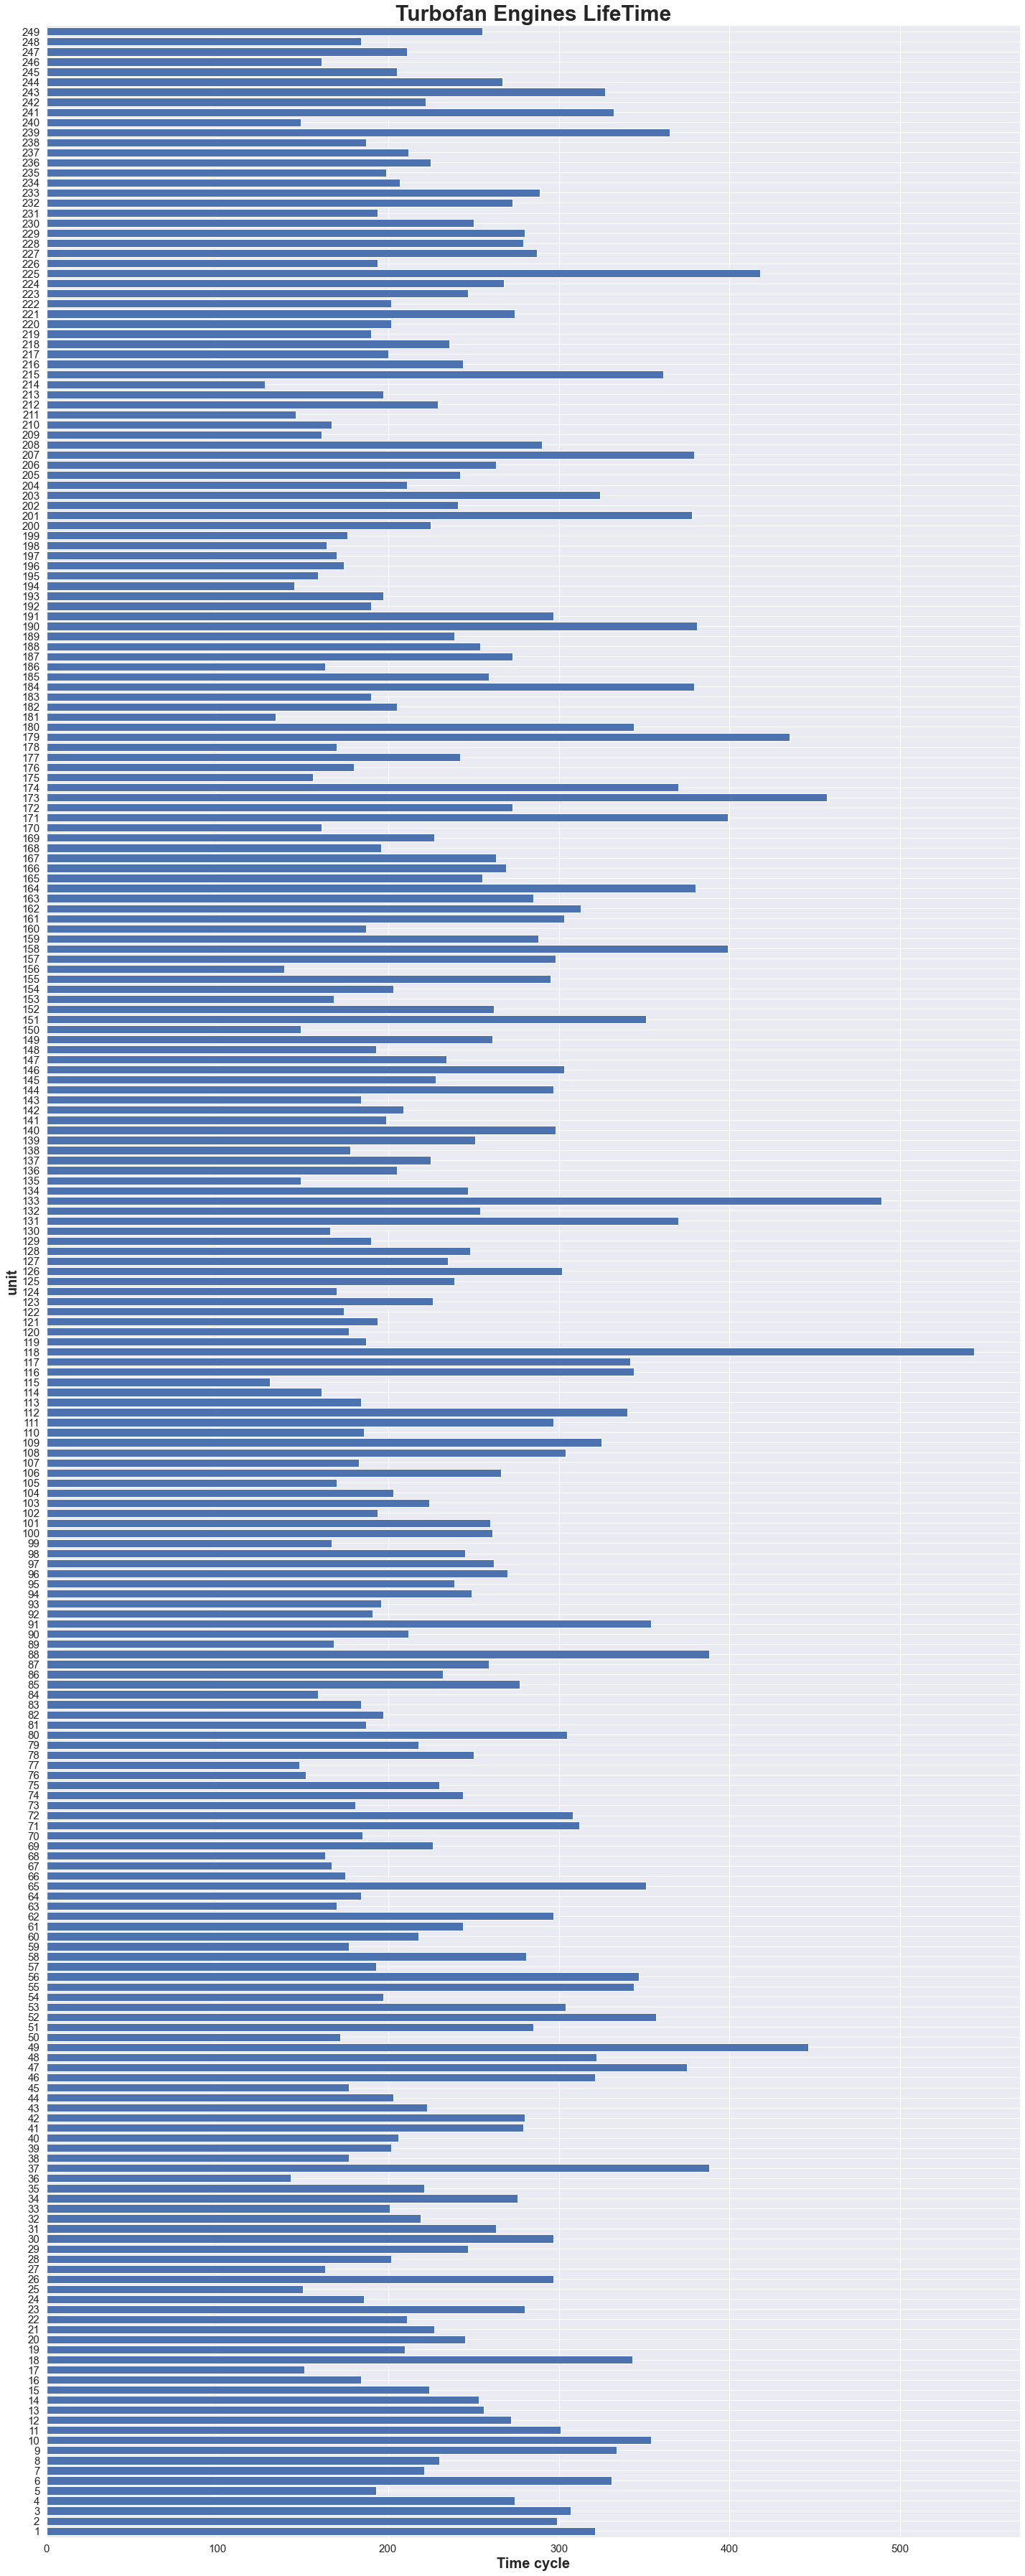

In [20]:
max_time_cycles=train[index_names].groupby('unit_nr').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 8.959999999999994, 'max time cycle')

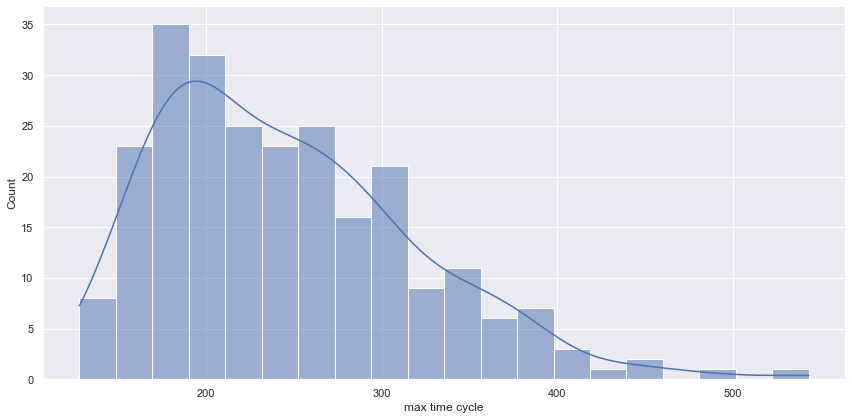

In [21]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

## Extraction of only Important Features which have strong relation affecting RUL of engine

In [22]:
# This is done to select only important features for model building in order to avoid problem of " Overfitting".

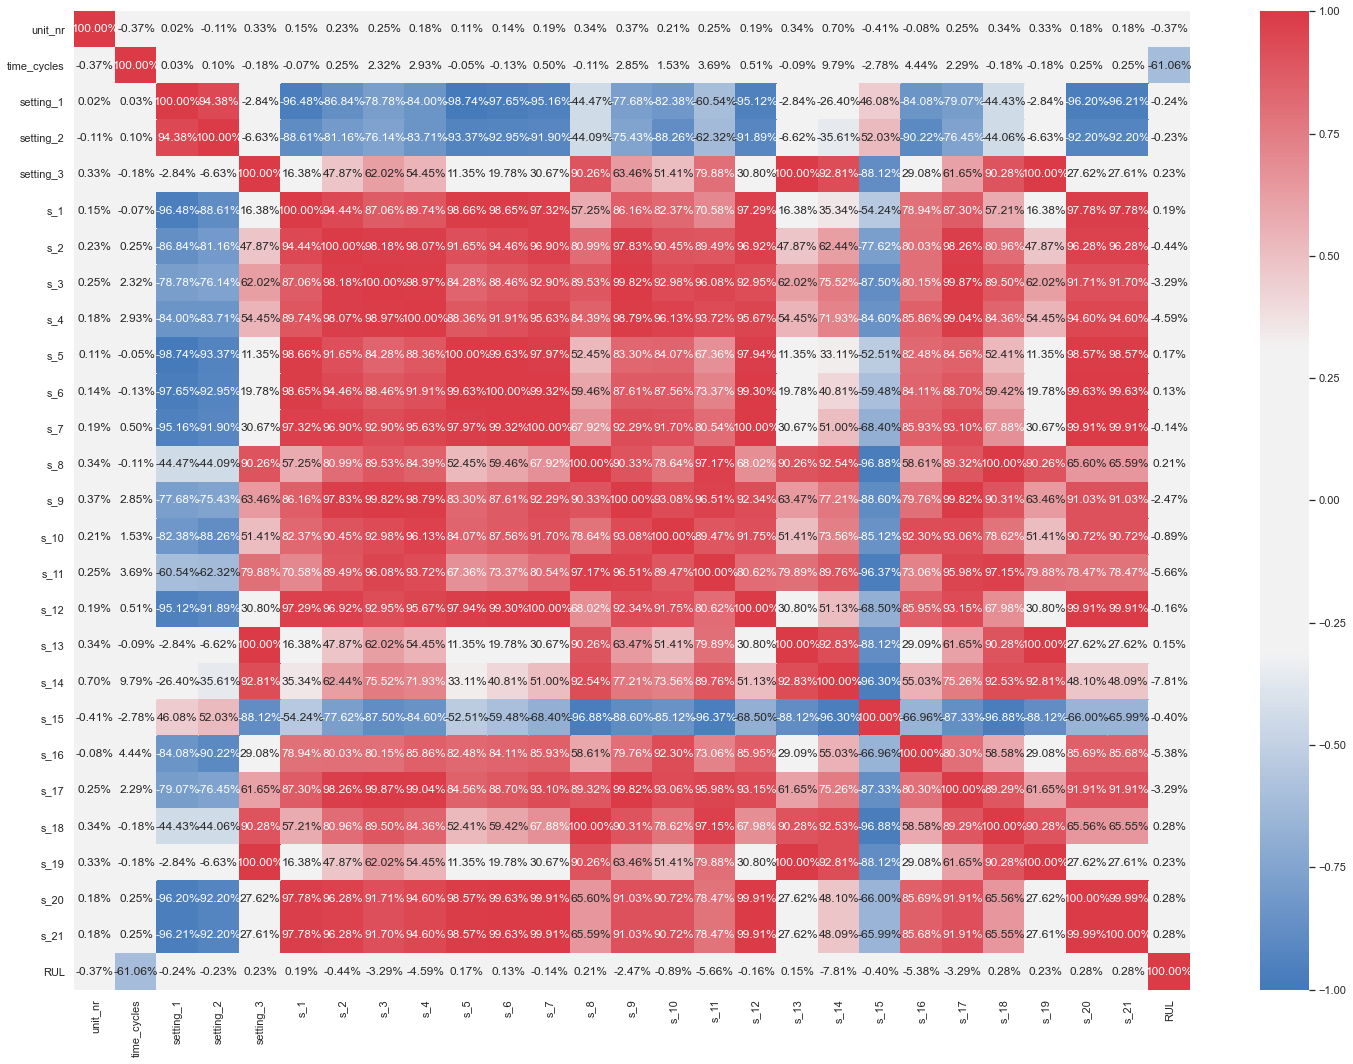

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 18))
correlation_matrix = train.corr()

# Define a custom color map with varying shades
cmap = sns.diverging_palette(250, 10, sep=80, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2%', vmin=-1, vmax=1)
plt.show()


From the above heatmap we can see all the features are correlated with each other

In [24]:
train.head(5)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    42.0049     0.8400      100.0  445.00  549.68   
1        1            2    20.0020     0.7002      100.0  491.19  606.07   
2        1            3    42.0038     0.8409      100.0  445.00  548.95   
3        1            4    42.0000     0.8400      100.0  445.00  548.70   
4        1            5    25.0063     0.6207       60.0  462.54  536.10   

       s_3      s_4   s_5  ...     s_13     s_14     s_15  s_16  s_17  s_18  \
0  1343.43  1112.93  3.91  ...  2387.99  8074.83   9.3335  0.02   330  2212   
1  1477.61  1237.50  9.35  ...  2387.73  8046.13   9.1913  0.02   361  2324   
2  1343.12  1117.05  3.91  ...  2387.97  8066.62   9.4007  0.02   329  2212   
3  1341.24  1118.03  3.91  ...  2388.02  8076.05   9.3369  0.02   328  2212   
4  1255.23  1033.59  7.05  ...  2028.08  7865.80  10.8366  0.02   305  1915   

     s_19   s_20     s_21  RUL  
0  100.00  10.62   6.3670  320  
1  100.00  24.37  14.6552  319  
2  100.00  10.48   6.4213  318  
3  100.00  10.54   6.4176  317  
4   84.93  14.03   8.6754  316  

[5 rows x 27 columns]

array([[<AxesSubplot:title={'center':'s_1'}>,
        <AxesSubplot:title={'center':'s_2'}>,
        <AxesSubplot:title={'center':'s_3'}>,
        <AxesSubplot:title={'center':'s_4'}>,
        <AxesSubplot:title={'center':'s_5'}>],
       [<AxesSubplot:title={'center':'s_6'}>,
        <AxesSubplot:title={'center':'s_7'}>,
        <AxesSubplot:title={'center':'s_8'}>,
        <AxesSubplot:title={'center':'s_9'}>,
        <AxesSubplot:title={'center':'s_10'}>],
       [<AxesSubplot:title={'center':'s_11'}>,
        <AxesSubplot:title={'center':'s_12'}>,
        <AxesSubplot:title={'center':'s_13'}>,
        <AxesSubplot:title={'center':'s_14'}>,
        <AxesSubplot:title={'center':'s_15'}>],
       [<AxesSubplot:title={'center':'s_16'}>,
        <AxesSubplot:title={'center':'s_17'}>,
        <AxesSubplot:title={'center':'s_18'}>,
        <AxesSubplot:title={'center':'s_19'}>,
        <AxesSubplot:title={'center':'s_20'}>],
       [<AxesSubplot:title={'center':'s_21'}>, <AxesSubplot:>,
  

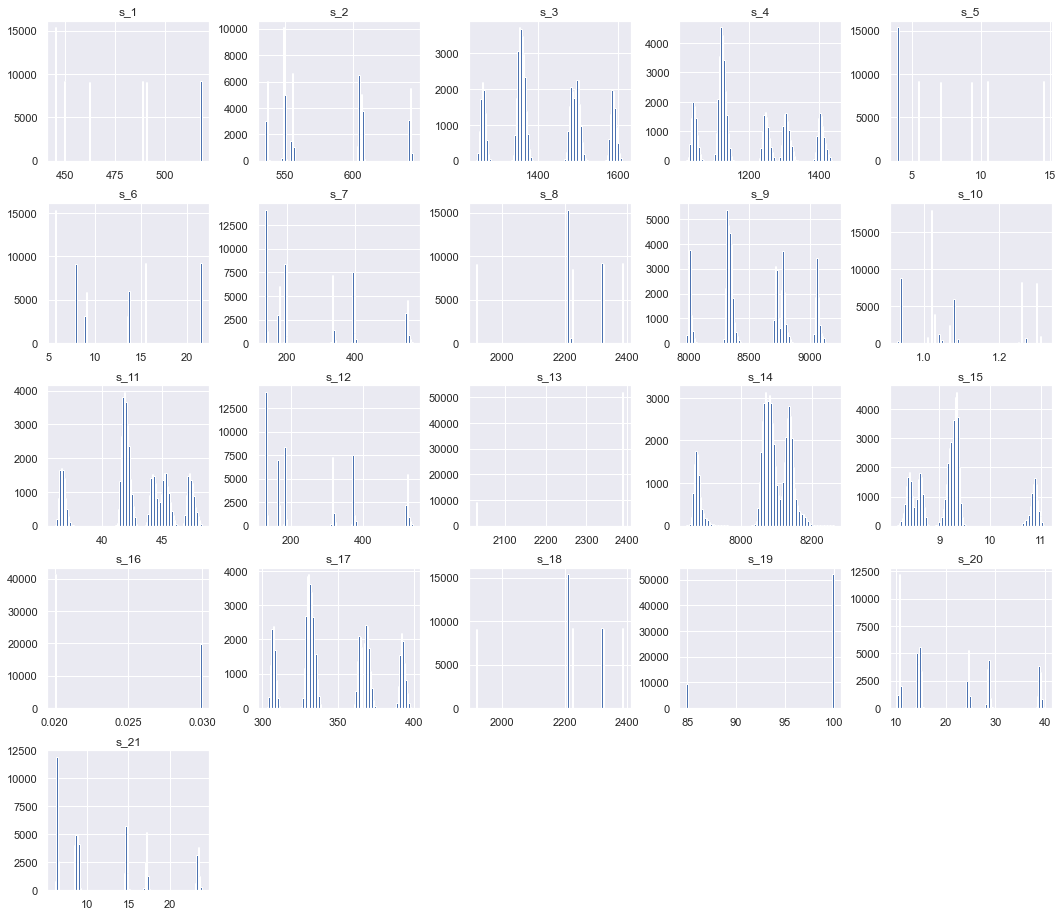

In [25]:
sensor_names=['s_{}'.format(i) for i in range(1,22) ]
pd.DataFrame(train,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

## Seperating Train & Test Data

In [26]:
# train & y_train
# Calculated RUL variable is our Target variable.
y_train=train['RUL']
X_train=train.drop(['unit_nr','time_cycles','RUL'],axis=1)
X_train.head(5)

setting_1  setting_2  setting_3     s_1     s_2      s_3      s_4   s_5  \
0    42.0049     0.8400      100.0  445.00  549.68  1343.43  1112.93  3.91   
1    20.0020     0.7002      100.0  491.19  606.07  1477.61  1237.50  9.35   
2    42.0038     0.8409      100.0  445.00  548.95  1343.12  1117.05  3.91   
3    42.0000     0.8400      100.0  445.00  548.70  1341.24  1118.03  3.91   
4    25.0063     0.6207       60.0  462.54  536.10  1255.23  1033.59  7.05   

     s_6     s_7  ...    s_12     s_13     s_14     s_15  s_16  s_17  s_18  \
0   5.70  137.36  ...  129.78  2387.99  8074.83   9.3335  0.02   330  2212   
1  13.61  332.10  ...  312.59  2387.73  8046.13   9.1913  0.02   361  2324   
2   5.69  138.18  ...  129.62  2387.97  8066.62   9.4007  0.02   329  2212   
3   5.70  137.98  ...  129.80  2388.02  8076.05   9.3369  0.02   328  2212   
4   9.00  174.82  ...  164.11  2028.08  7865.80  10.8366  0.02   305  1915   

     s_19   s_20     s_21  
0  100.00  10.62   6.3670  
1  100.00  24.37  14.6552  
2  100.00  10.48   6.4213  
3  100.00  10.54   6.4176  
4   84.93  14.03   8.6754  

[5 rows x 24 columns]

In [27]:
test.head(5)

setting_1  setting_2  setting_3     s_1     s_2      s_3      s_4   s_5  \
0    25.0070     0.6214       60.0  462.54  537.66  1264.31  1046.41  7.05   
1    41.9989     0.8400      100.0  445.00  549.96  1354.05  1133.55  3.91   
2    42.0005     0.8401      100.0  445.00  549.47  1341.06  1118.90  3.91   
3    25.0018     0.6207       60.0  462.54  536.06  1253.49  1038.53  7.05   
4    25.0039     0.6200       60.0  462.54  537.36  1263.60  1052.52  7.05   

    s_6     s_7  ...    s_12     s_13     s_14     s_15  s_16  s_17  s_18  \
0  8.99  176.56  ...  166.19  2028.53  7890.31  10.7615  0.02   308  1915   
1  5.72  139.03  ...  130.17  2387.72  8073.44   9.3925  0.02   331  2212   
2  5.69  139.26  ...  130.73  2388.18  8095.58   9.2974  0.02   330  2212   
3  9.00  175.63  ...  164.91  2028.30  7878.63  10.8396  0.02   306  1915   
4  9.03  175.53  ...  164.95  2028.24  7873.75  10.9094  0.02   307  1915   

     s_19   s_20    s_21  
0   84.93  14.41  8.6329  
1  100.00  10.58  6.4325  
2  100.00  10.61  6.3488  
3   84.93  14.41  8.5696  
4   84.93  14.19  8.6248  

[5 rows x 24 columns]

In [28]:
# Check the columns in X_train
print(X_train.columns)

# Test data set, keeping only train columns/features.
X_test = test[X_train.columns]
X_test.head(5)


Index(['setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4',
       's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21'],
      dtype='object')


setting_1  setting_2  setting_3     s_1     s_2      s_3      s_4   s_5  \
0    25.0070     0.6214       60.0  462.54  537.66  1264.31  1046.41  7.05   
1    41.9989     0.8400      100.0  445.00  549.96  1354.05  1133.55  3.91   
2    42.0005     0.8401      100.0  445.00  549.47  1341.06  1118.90  3.91   
3    25.0018     0.6207       60.0  462.54  536.06  1253.49  1038.53  7.05   
4    25.0039     0.6200       60.0  462.54  537.36  1263.60  1052.52  7.05   

    s_6     s_7  ...    s_12     s_13     s_14     s_15  s_16  s_17  s_18  \
0  8.99  176.56  ...  166.19  2028.53  7890.31  10.7615  0.02   308  1915   
1  5.72  139.03  ...  130.17  2387.72  8073.44   9.3925  0.02   331  2212   
2  5.69  139.26  ...  130.73  2388.18  8095.58   9.2974  0.02   330  2212   
3  9.00  175.63  ...  164.91  2028.30  7878.63  10.8396  0.02   306  1915   
4  9.03  175.53  ...  164.95  2028.24  7873.75  10.9094  0.02   307  1915   

     s_19   s_20    s_21  
0   84.93  14.41  8.6329  
1  100.00  10.58  6.4325  
2  100.00  10.61  6.3488  
3   84.93  14.41  8.5696  
4   84.93  14.19  8.6248  

[5 rows x 24 columns]

In [29]:
y_test.head(5)

RUL
0   22
1   39
2  107
3   75
4  149

In [30]:
y_train.describe()

count    61249.000000
mean       133.311417
std         89.783389
min          0.000000
25%         61.000000
50%        122.000000
75%        190.000000
max        542.000000
Name: RUL, dtype: float64

In [31]:
# Clipping of RUL at 103 , RUL is left skewed.
# This is done to improve performance of the applied models.

y_train= y_train.clip(upper=103)
y_train.head(5)

0    103
1    103
2    103
3    103
4    103
Name: RUL, dtype: int64

In [32]:
y_test.describe()

RUL
count  248.000000
mean    86.552419
std     54.634054
min      6.000000
25%     36.000000
50%     88.000000
75%    126.750000
max    195.000000

In [33]:
y_test= y_test.clip(upper=103)
y_test.head(5)

RUL
0   22
1   39
2  103
3   75
4  103

## Building Model

In [34]:
# first create an evaluate function
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse,variance;

## Bi-LSTM model

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# Model 8: Bidirectional LSTM
def build_bilstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=input_shape))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [37]:
# Preprocess data for LSTM
scaler_lstm = StandardScaler()
X_train_lstm = scaler_lstm.fit_transform(X_train)
X_test_lstm = scaler_lstm.transform(X_test)

In [38]:
# Reshape input for LSTM (assuming your data is sequential)
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))


In [39]:
# Build and train the Bidirectional LSTM model
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
bilstm_model = build_bilstm_model(input_shape)


In [40]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [41]:
# Train the model
bilstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
1532/1532 [==============================] - 8s 3ms/step - loss: 1688.8165 - mae: 33.0156 - val_loss: 798.5042 - val_mae: 23.7089
Epoch 2/100
1532/1532 [==============================] - 5s 3ms/step - loss: 605.9501 - mae: 20.1843 - val_loss: 507.2729 - val_mae: 18.2115
Epoch 3/100
1532/1532 [==============================] - 4s 3ms/step - loss: 447.8684 - mae: 16.4299 - val_loss: 430.0755 - val_mae: 16.2715
Epoch 4/100
1532/1532 [==============================] - 4s 3ms/step - loss: 399.5884 - mae: 15.4817 - val_loss: 390.1530 - val_mae: 15.6360
Epoch 5/100
1532/1532 [==============================] - 5s 3ms/step - loss: 373.6090 - mae: 15.1035 - val_loss: 368.4048 - val_mae: 15.3813
Epoch 6/100
1532/1532 [==============================] - 5s 3ms/step - loss: 359.9760 - mae: 14.9507 - val_loss: 353.4301 - val_mae: 15.0433
Epoch 7/100
1532/1532 [==============================] - 5s 3ms/step - loss: 349.7343 - mae: 14.7921 - val_loss: 354.1788 - val_mae: 15.2733
Epoch 8/100


In [42]:
# Evaluate on train data
y_hat_train_lstm = bilstm_model.predict(X_train_lstm)
RMSE_Train_LSTM, R2_Train_LSTM = evaluate(y_train, y_hat_train_lstm, 'train')

1915/1915 [==============================] - 3s 2ms/step
train set RMSE:14.724660070134252, R2:0.789151885532175


In [43]:
# Evaluate on test data
y_hat_test_lstm = bilstm_model.predict(X_test_lstm)
RMSE_Test_LSTM, R2_Test_LSTM = evaluate(y_test, y_hat_test_lstm, 'test')


8/8 [==============================] - 0s 2ms/step
test set RMSE:16.834132787459502, R2:0.7790707073922121


In [44]:
# Make Dataframe which will contain results of all applied Model
Results=pd.DataFrame({'Model': ['BiLSTM'],
    'RMSE-Train': [RMSE_Train_LSTM],
    'R2-Train': [R2_Train_LSTM],
    'RMSE-Test': [RMSE_Test_LSTM],
    'R2-Test': [R2_Test_LSTM]})
Results

Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0  BiLSTM    14.72466  0.789152  16.834133  0.779071

## Bi-TRNN model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Model: Bidirectional TRNN (replace with your desired function name)
def Bi_trnn(input_shape):
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(50, activation='relu'), input_shape=input_shape))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Preprocess data for Bi-TRNN
scaler_bi_trnn = StandardScaler()
X_train_bi_trnn = scaler_bi_trnn.fit_transform(X_train)
X_test_bi_trnn = scaler_bi_trnn.transform(X_test)

# Reshape input for Bi-TRNN (assuming your data is sequential)
X_train_bi_trnn = X_train_bi_trnn.reshape((X_train_bi_trnn.shape[0], X_train_bi_trnn.shape[1], 1))
X_test_bi_trnn = X_test_bi_trnn.reshape((X_test_bi_trnn.shape[0], X_test_bi_trnn.shape[1], 1))

# Build and train the Bidirectional TRNN model
input_shape_bi_trnn = (X_train_bi_trnn.shape[1], X_train_bi_trnn.shape[2])
bi_trnn_model = Bi_trnn(input_shape_bi_trnn)

# Define early stopping to prevent overfitting
early_stopping_bi_trnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
bi_trnn_model.fit(X_train_bi_trnn, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_bi_trnn])

# Evaluate on train data
y_hat_train_bi_trnn = bi_trnn_model.predict(X_train_bi_trnn)
RMSE_Train_BiTRNN, R2_Train_BiTRNN = evaluate(y_train, y_hat_train_bi_trnn, 'train')

# Evaluate on test data
y_hat_test_bi_trnn = bi_trnn_model.predict(X_test_bi_trnn)
RMSE_Test_BiTRNN, R2_Test_BiTRNN = evaluate(y_test, y_hat_test_bi_trnn, 'test')

# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['BiTRNN'],
    'RMSE-Train': [RMSE_Train_BiTRNN],
    'R2-Train': [R2_Train_BiTRNN],
    'RMSE-Test': [RMSE_Test_BiTRNN],
    'R2-Test': [R2_Test_BiTRNN]
}), ignore_index=True)

# Display the results DataFrame
Results


Epoch 1/50
1532/1532 [==============================] - 13s 7ms/step - loss: 863.0718 - mae: 22.4101 - val_loss: 514.5337 - val_mae: 20.1466
Epoch 2/50
1532/1532 [==============================] - 12s 8ms/step - loss: 434.8440 - mae: 15.6258 - val_loss: 364.4587 - val_mae: 16.1614
Epoch 3/50
1532/1532 [==============================] - 11s 7ms/step - loss: 386.9776 - mae: 14.7193 - val_loss: 293.0598 - val_mae: 13.4446
Epoch 4/50
1532/1532 [==============================] - 11s 7ms/step - loss: 342.7115 - mae: 13.8545 - val_loss: 525.0810 - val_mae: 20.3330
Epoch 5/50
1532/1532 [==============================] - 10s 7ms/step - loss: 319.0300 - mae: 13.2410 - val_loss: 368.0190 - val_mae: 13.7964
Epoch 6/50
1532/1532 [==============================] - 10s 6ms/step - loss: 297.4352 - mae: 12.6618 - val_loss: 255.2573 - val_mae: 11.3337
Epoch 7/50
1532/1532 [==============================] - 10s 6ms/step - loss: 285.0184 - mae: 12.2698 - val_loss: 323.7867 - val_mae: 15.4027
Epoch 8/50
15

Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0  BiLSTM   14.724660  0.789152  16.834133  0.779071
1  BiTRNN   14.429744  0.797513  15.877158  0.803475

## Bi-GRU model

In [46]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping


In [47]:
# Model: Bidirectional GRU (Bi-GRU)
def build_bi_gru_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(GRU(50, activation='relu'), input_shape=input_shape))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [48]:
# Preprocess data for GRU
scaler_bi_gru = StandardScaler()
X_train_bi_gru = scaler_bi_gru.fit_transform(X_train)
X_test_bi_gru = scaler_bi_gru.transform(X_test)


In [49]:
# Reshape input for GRU (assuming your data is sequential)
X_train_bi_gru = X_train_bi_gru.reshape((X_train_bi_gru.shape[0], 1, X_train_bi_gru.shape[1]))
X_test_bi_gru = X_test_bi_gru.reshape((X_test_bi_gru.shape[0], 1, X_test_bi_gru.shape[1]))


In [50]:
# Build and train the Bidirectional GRU model
input_shape_bi_gru = (X_train_bi_gru.shape[1], X_train_bi_gru.shape[2])
bi_gru_model = build_bi_gru_model(input_shape_bi_gru)


In [51]:
# Define early stopping to prevent overfitting
early_stopping_bi_gru = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [52]:
# Train the model
bi_gru_model.fit(X_train_bi_gru, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_bi_gru])


Epoch 1/50
1532/1532 [==============================] - 11s 4ms/step - loss: 1660.3715 - mae: 32.8484 - val_loss: 801.2816 - val_mae: 24.2625
Epoch 2/50
1532/1532 [==============================] - 6s 4ms/step - loss: 592.9149 - mae: 19.8330 - val_loss: 495.6000 - val_mae: 17.6026
Epoch 3/50
1532/1532 [==============================] - 5s 3ms/step - loss: 426.5833 - mae: 15.8846 - val_loss: 410.0060 - val_mae: 16.1814
Epoch 4/50
1532/1532 [==============================] - 5s 3ms/step - loss: 377.7926 - mae: 14.9915 - val_loss: 370.3648 - val_mae: 15.3808
Epoch 5/50
1532/1532 [==============================] - 5s 3ms/step - loss: 354.1342 - mae: 14.6068 - val_loss: 349.1936 - val_mae: 14.9624
Epoch 6/50
1532/1532 [==============================] - 5s 3ms/step - loss: 337.9446 - mae: 14.3141 - val_loss: 328.4422 - val_mae: 14.1923
Epoch 7/50
1532/1532 [==============================] - 4s 3ms/step - loss: 327.0253 - mae: 14.1203 - val_loss: 315.8527 - val_mae: 14.1369
Epoch 8/50
1532/15

In [53]:
# Evaluate on train data
y_hat_train_bi_gru = bi_gru_model.predict(X_train_bi_gru)
RMSE_Train_BiGRU, R2_Train_BiGRU = evaluate(y_train, y_hat_train_bi_gru, 'train')


1915/1915 [==============================] - 5s 2ms/step
train set RMSE:15.183634413144164, R2:0.7758025630808348


In [54]:
# Evaluate on test data
y_hat_test_bi_gru = bi_gru_model.predict(X_test_bi_gru)
RMSE_Test_BiGRU, R2_Test_BiGRU = evaluate(y_test, y_hat_test_bi_gru, 'test')


8/8 [==============================] - 0s 4ms/step
test set RMSE:17.606156356627086, R2:0.7583421464394596


In [55]:
# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['BiGRU'],
    'RMSE-Train': [RMSE_Train_BiGRU],
    'R2-Train': [R2_Train_BiGRU],
    'RMSE-Test': [RMSE_Test_BiGRU],
    'R2-Test': [R2_Test_BiGRU]
}), ignore_index=True)


In [56]:
# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0  BiLSTM   14.724660  0.789152  16.834133  0.779071
1  BiTRNN   14.429744  0.797513  15.877158  0.803475
2   BiGRU   15.183634  0.775803  17.606156  0.758342

## Prognet model

In [57]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping


In [58]:
# Model: ProgNet (Progressive Neural Network)
def build_prognet_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [59]:
# Preprocess data for ProgNet
scaler_prognet = StandardScaler()
X_train_prognet = scaler_prognet.fit_transform(X_train)
X_test_prognet = scaler_prognet.transform(X_test)


In [60]:
# Reshape input for LSTM (assuming your data is sequential)
X_train_prognet = X_train_prognet.reshape((X_train_prognet.shape[0], X_train_prognet.shape[1], 1))

# Build and train the ProgNet model
input_shape_prognet = (X_train_prognet.shape[1], X_train_prognet.shape[2])
prognet_model = build_prognet_model(input_shape_prognet)


In [61]:
# Define early stopping to prevent overfitting
early_stopping_prognet = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [62]:
# Train the model
prognet_model.fit(X_train_prognet, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_prognet])


Epoch 1/50
1532/1532 [==============================] - 56s 33ms/step - loss: 1188.2742 - mae: 28.4610 - val_loss: 1049.4286 - val_mae: 28.9160
Epoch 2/50
1532/1532 [==============================] - 49s 32ms/step - loss: 835.8043 - mae: 23.3701 - val_loss: 985.1768 - val_mae: 25.9765
Epoch 3/50
1532/1532 [==============================] - 50s 33ms/step - loss: 447.5160 - mae: 15.3931 - val_loss: 492.6965 - val_mae: 16.1152
Epoch 4/50
1532/1532 [==============================] - 50s 33ms/step - loss: 380.0660 - mae: 13.8890 - val_loss: 381.6622 - val_mae: 13.5613
Epoch 5/50
1532/1532 [==============================] - 49s 32ms/step - loss: 328.1347 - mae: 12.8764 - val_loss: 304.9101 - val_mae: 12.2079
Epoch 6/50
1532/1532 [==============================] - 49s 32ms/step - loss: 303.0821 - mae: 12.3062 - val_loss: 249.0589 - val_mae: 11.2427
Epoch 7/50
1532/1532 [==============================] - 30s 20ms/step - loss: 283.0354 - mae: 11.7937 - val_loss: 230.3119 - val_mae: 10.2464
Epoc

In [63]:
# Evaluate on train data
y_hat_train_prognet = prognet_model.predict(X_train_prognet)
RMSE_Train_ProgNet, R2_Train_ProgNet = evaluate(y_train, y_hat_train_prognet, 'train')


1915/1915 [==============================] - 14s 7ms/step
train set RMSE:15.376078095531012, R2:0.7700834051523779


In [64]:
# Reshape input for LSTM (assuming your data is sequential)
X_test_prognet = X_test_prognet.reshape((X_test_prognet.shape[0], X_test_prognet.shape[1], 1))

# Evaluate on test data
y_hat_test_prognet = prognet_model.predict(X_test_prognet)

# Now you can proceed with the evaluation
RMSE_Test_ProgNet, R2_Test_ProgNet = evaluate(y_test, y_hat_test_prognet, 'test')


8/8 [==============================] - 0s 9ms/step
test set RMSE:17.35138540095084, R2:0.7652853932948975


In [65]:
# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['ProgNet'],
    'RMSE-Train': [RMSE_Train_ProgNet],
    'R2-Train': [R2_Train_ProgNet],
    'RMSE-Test': [RMSE_Test_ProgNet],
    'R2-Test': [R2_Test_ProgNet]
}), ignore_index=True)

In [66]:
# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0   BiLSTM   14.724660  0.789152  16.834133  0.779071
1   BiTRNN   14.429744  0.797513  15.877158  0.803475
2    BiGRU   15.183634  0.775803  17.606156  0.758342
3  ProgNet   15.376078  0.770083  17.351385  0.765285

## DCNN model

In [67]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
# Model: Deep Convolutional Neural Network (DCNN)
def build_dcnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [69]:
# Preprocess data for DCNN
scaler_dcnn = StandardScaler()
X_train_dcnn = scaler_dcnn.fit_transform(X_train)
X_test_dcnn = scaler_dcnn.transform(X_test)

In [70]:
# Reshape input for DCNN (assuming your data is sequential)
X_train_dcnn = X_train_dcnn.reshape((X_train_dcnn.shape[0], X_train_dcnn.shape[1], 1))
X_test_dcnn = X_test_dcnn.reshape((X_test_dcnn.shape[0], X_test_dcnn.shape[1], 1))


In [71]:
# Build and train the DCNN model
input_shape_dcnn = (X_train_dcnn.shape[1], X_train_dcnn.shape[2])
dcnn_model = build_dcnn_model(input_shape_dcnn)

In [72]:
# Define early stopping to prevent overfitting
early_stopping_dcnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [73]:
# Train the model
dcnn_model.fit(X_train_dcnn, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_dcnn])


Epoch 1/50
1532/1532 [==============================] - 6s 3ms/step - loss: 1229.6086 - mae: 28.8337 - val_loss: 882.7194 - val_mae: 25.0239
Epoch 2/50
1532/1532 [==============================] - 5s 3ms/step - loss: 574.2826 - mae: 18.6571 - val_loss: 492.9545 - val_mae: 18.2657
Epoch 3/50
1532/1532 [==============================] - 5s 3ms/step - loss: 374.5012 - mae: 14.3754 - val_loss: 363.2955 - val_mae: 15.0998
Epoch 4/50
1532/1532 [==============================] - 5s 3ms/step - loss: 312.4396 - mae: 13.0583 - val_loss: 288.9314 - val_mae: 12.7831
Epoch 5/50
1532/1532 [==============================] - 5s 3ms/step - loss: 279.3809 - mae: 12.2081 - val_loss: 279.0066 - val_mae: 13.1726
Epoch 6/50
1532/1532 [==============================] - 6s 4ms/step - loss: 261.5608 - mae: 11.6191 - val_loss: 252.3844 - val_mae: 11.2996
Epoch 7/50
1532/1532 [==============================] - 6s 4ms/step - loss: 251.2268 - mae: 11.2237 - val_loss: 267.4936 - val_mae: 11.0489
Epoch 8/50
1532/153

In [74]:
# Evaluate on train data
y_hat_train_dcnn = dcnn_model.predict(X_train_dcnn)
RMSE_Train_DCNN, R2_Train_DCNN = evaluate(y_train, y_hat_train_dcnn, 'train')


1915/1915 [==============================] - 3s 1ms/step
train set RMSE:14.333688931014402, R2:0.8002001688261846


In [75]:
# Evaluate on test data
y_hat_test_dcnn = dcnn_model.predict(X_test_dcnn)
RMSE_Test_DCNN, R2_Test_DCNN = evaluate(y_test, y_hat_test_dcnn, 'test')


8/8 [==============================] - 0s 3ms/step
test set RMSE:16.906161304424746, R2:0.777176074199719


In [76]:
# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['DCNN'],
    'RMSE-Train': [RMSE_Train_DCNN],
    'R2-Train': [R2_Train_DCNN],
    'RMSE-Test': [RMSE_Test_DCNN],
    'R2-Test': [R2_Test_DCNN]
}), ignore_index=True)

In [77]:
# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0   BiLSTM   14.724660  0.789152  16.834133  0.779071
1   BiTRNN   14.429744  0.797513  15.877158  0.803475
2    BiGRU   15.183634  0.775803  17.606156  0.758342
3  ProgNet   15.376078  0.770083  17.351385  0.765285
4     DCNN   14.333689  0.800200  16.906161  0.777176

## Individual model result

In [78]:
# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0   BiLSTM   14.724660  0.789152  16.834133  0.779071
1   BiTRNN   14.429744  0.797513  15.877158  0.803475
2    BiGRU   15.183634  0.775803  17.606156  0.758342
3  ProgNet   15.376078  0.770083  17.351385  0.765285
4     DCNN   14.333689  0.800200  16.906161  0.777176

## Ensemble model using RDT(Regression Decision Tree)

In [79]:
# Concatenate predictions from all the base learners  for training data
X_train_ensemble = np.concatenate((y_hat_train_bi_trnn, y_hat_train_bi_gru, y_hat_train_dcnn, y_hat_train_prognet, y_hat_train_lstm), axis=1)

# Concatenate predictions from all the base learners for test data
X_test_ensemble = np.concatenate((y_hat_test_bi_trnn,y_hat_test_bi_gru,y_hat_test_dcnn, y_hat_test_prognet, y_hat_test_lstm), axis=1)


In [80]:
# Model : Regression Decision Tree (RDT)
rdt_model = DecisionTreeRegressor()

# Train the RDT model
rdt_model.fit(X_train_ensemble, y_train)


DecisionTreeRegressor()

In [81]:
# Predictions on training data
y_hat_train_ensemble = rdt_model.predict(X_train_ensemble)
RMSE_Train_Ensemble, R2_Train_Ensemble = evaluate(y_train, y_hat_train_ensemble, 'train')

# Predictions on test data
y_hat_test_ensemble = rdt_model.predict(X_test_ensemble)
RMSE_Test_Ensemble, R2_Test_Ensemble = evaluate(y_test, y_hat_test_ensemble, 'test')


train set RMSE:0.0, R2:1.0
test set RMSE:22.861963057417217, R2:0.5925269949666723


In [82]:
# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['Ensemble (Bi-trnn+ Bi-GRU+ DCNN+ProgNet +Bi-LSTM)'],
    'RMSE-Train': [RMSE_Train_Ensemble],
    'R2-Train': [R2_Train_Ensemble],
    'RMSE-Test': [RMSE_Test_Ensemble],
    'R2-Test': [R2_Test_Ensemble]
}), ignore_index=True)

# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  \
0                                             BiLSTM   14.724660  0.789152   
1                                             BiTRNN   14.429744  0.797513   
2                                              BiGRU   15.183634  0.775803   
3                                            ProgNet   15.376078  0.770083   
4                                               DCNN   14.333689  0.800200   
5  Ensemble (Bi-trnn+ Bi-GRU+ DCNN+ProgNet +Bi-LSTM)    0.000000  1.000000   

   RMSE-Test   R2-Test  
0  16.834133  0.779071  
1  15.877158  0.803475  
2  17.606156  0.758342  
3  17.351385  0.765285  
4  16.906161  0.777176  
5  22.861963  0.592527

## Ensemble model using Random Forest Regressor

In [83]:
# Model : Random Forest 
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)


In [84]:
# Train the Random Forest model
random_forest_model.fit(X_train_ensemble, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [85]:
# Predictions on training data
y_hat_train_rf = random_forest_model.predict(X_train_ensemble)
RMSE_Train_RF, R2_Train_RF = evaluate(y_train, y_hat_train_rf, 'train')

# Predictions on test data
y_hat_test_rf = random_forest_model.predict(X_test_ensemble)
RMSE_Test_RF, R2_Test_RF = evaluate(y_test, y_hat_test_rf, 'test')


train set RMSE:12.502493362755816, R2:0.847989904501115
test set RMSE:15.69259795828027, R2:0.808017562428885


In [86]:

# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['Random Forest (Ensemble)'],
    'RMSE-Train': [RMSE_Train_RF],
    'R2-Train': [R2_Train_RF],
    'RMSE-Test': [RMSE_Test_RF],
    'R2-Test': [R2_Test_RF]
}), ignore_index=True)

# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  \
0                                             BiLSTM   14.724660  0.789152   
1                                             BiTRNN   14.429744  0.797513   
2                                              BiGRU   15.183634  0.775803   
3                                            ProgNet   15.376078  0.770083   
4                                               DCNN   14.333689  0.800200   
5  Ensemble (Bi-trnn+ Bi-GRU+ DCNN+ProgNet +Bi-LSTM)    0.000000  1.000000   
6                           Random Forest (Ensemble)   12.502493  0.847990   

   RMSE-Test   R2-Test  
0  16.834133  0.779071  
1  15.877158  0.803475  
2  17.606156  0.758342  
3  17.351385  0.765285  
4  16.906161  0.777176  
5  22.861963  0.592527  
6  15.692598  0.808018

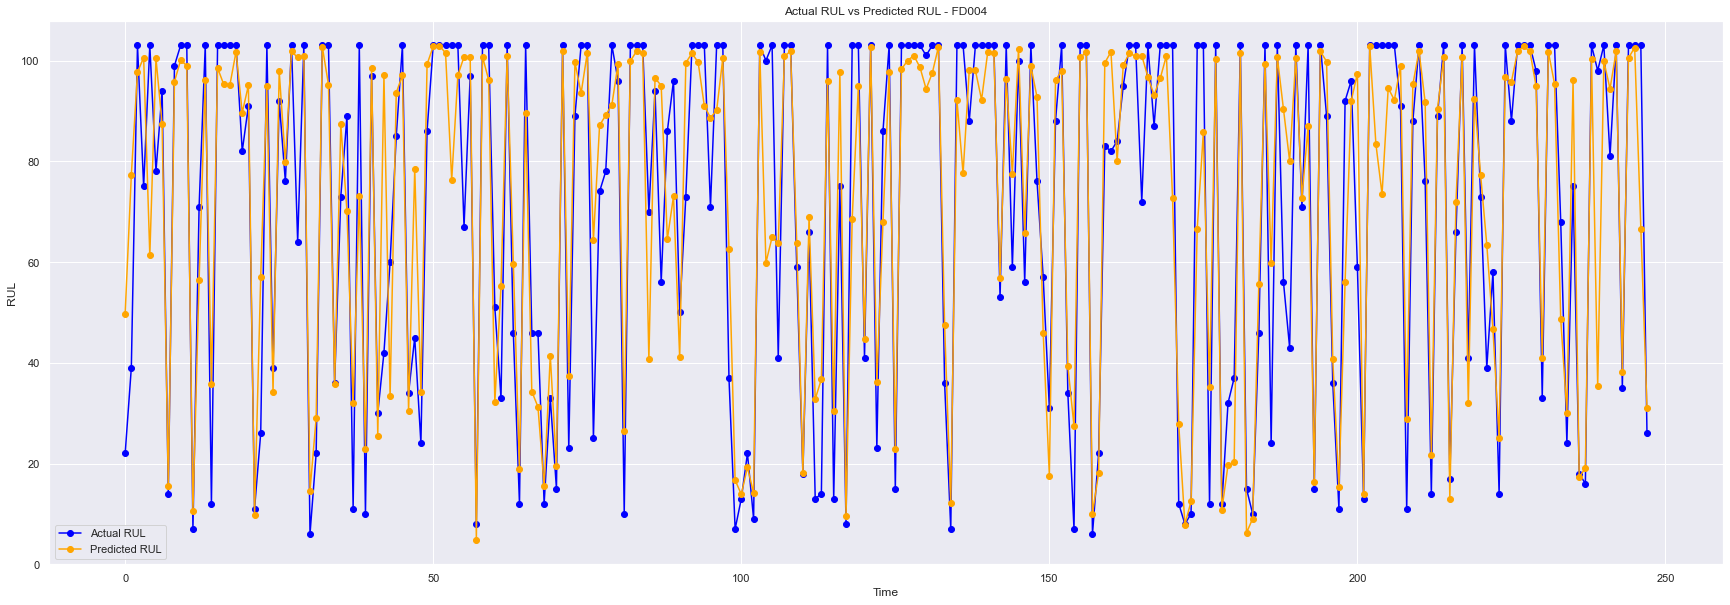

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_hat_test_bi_tcn are your actual and predicted RUL values
plt.figure(figsize=(30, 10))

# Line chart for actual RUL
plt.plot(y_test, label='Actual RUL', marker='o', linestyle='-', color='blue')

# Line chart for predicted RUL
plt.plot(y_hat_test_rf, label='Predicted RUL', marker='o', linestyle='-', color='orange')

plt.title('Actual RUL vs Predicted RUL - FD004')
plt.xlabel('Time')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

In [88]:
Results

Model  RMSE-Train  R2-Train  \
0                                             BiLSTM   14.724660  0.789152   
1                                             BiTRNN   14.429744  0.797513   
2                                              BiGRU   15.183634  0.775803   
3                                            ProgNet   15.376078  0.770083   
4                                               DCNN   14.333689  0.800200   
5  Ensemble (Bi-trnn+ Bi-GRU+ DCNN+ProgNet +Bi-LSTM)    0.000000  1.000000   
6                           Random Forest (Ensemble)   12.502493  0.847990   

   RMSE-Test   R2-Test  
0  16.834133  0.779071  
1  15.877158  0.803475  
2  17.606156  0.758342  
3  17.351385  0.765285  
4  16.906161  0.777176  
5  22.861963  0.592527  
6  15.692598  0.808018

## Base Paper Result

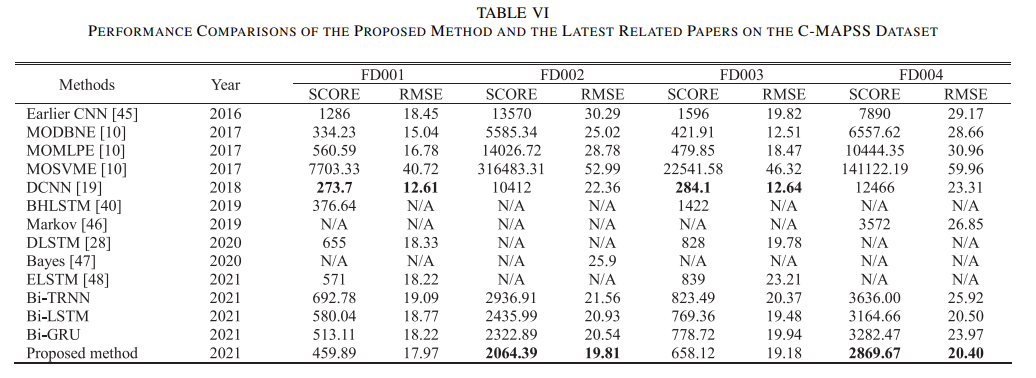